In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    
    major_axis_length = np.sqrt(1 + pearson)
    minor_axis_length = np.sqrt(1 - pearson)
    
    eig_vals, eig_vecs = np.linalg.eig(cov)

    if eig_vals[0] > eig_vals[1]:
        width = major_axis_length * 2
        height = minor_axis_length * 2
    else:
        width = minor_axis_length * 2
        height = major_axis_length * 2
        
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.

    ellipse = Ellipse((0, 0),
        width=width,
        height=height,
        facecolor=facecolor,
        **kwargs)    
    
    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    # angle = np.arcsin(abs(eig_vecs[1][0]))/np.pi*180  # i think this is it
    # sign = np.round(np.cross(eig_vecs[:, 0], eig_vecs[:, 1]).item())
    angle = np.arccos(eig_vecs[0, 0])/np.pi*180
    # print(angle)
    
    transf = transforms.Affine2D() \
        .rotate_deg(angle) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


In [3]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]


# Example

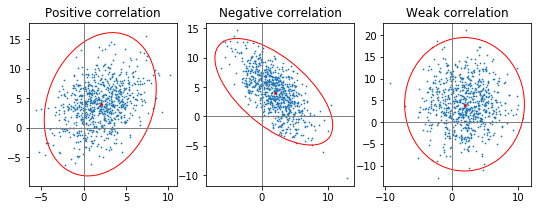

In [4]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': np.array([[0.85, 0.35],
                                      [0.15, -0.65]]),
    'Negative correlation': np.array([[0.9, -0.4],
                                      [0.1, -0.6]]),
    'Weak correlation': np.array([[1, 0],
                                  [0, 1]]),
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
i=0
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    ax, (title, dependency) 
    
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)
#     if i==1:
#         break

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)
    i+=1


plt.show()

# Test

In [5]:
x = np.array([425.        , 423.        , 381.        , 384.        ,
        382.        , 384.        , 386.8       , 390.85      ,
        394.51851852, 397.85714286, 387.77777778, 389.7       ,
        392.61538462, 397.45454545, 386.        , 396.59259259,
        401.        , 402.        ])[2:]
x = x-np.mean(x)
y = np.array([842.        , 848.        , 881.        , 882.        ,
        884.66666667, 885.5       , 886.7       , 887.2       ,
        887.03703704, 887.57142857, 888.88888889, 891.3       ,
        892.53846154, 890.45454545, 893.        , 893.88888889,
        893.        , 895.5       ])[2:]
y = y-np.mean(y)
n_std=3.0
facecolor='none'

In [6]:
# correlation

if x.size != y.size:
    raise ValueError("x and y must be the same size")

cov = np.cov(x, y)
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
# Using a special case to obtain the eigenvalues of this
# two-dimensionl dataset.
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
ellipse = Ellipse((0, 0),
    width=ell_radius_x * 2,
    height=ell_radius_y * 2,
    facecolor=facecolor)

# Calculating the stdandard deviation of x from
# the squareroot of the variance and multiplying
# with the given number of standard deviations.
scale_x = np.sqrt(cov[0, 0]) * n_std
mean_x = np.mean(x)

# calculating the stdandard deviation of y ...
scale_y = np.sqrt(cov[1, 1]) * n_std
mean_y = np.mean(y)


eig_vals, eig_vecs = np.linalg.eig(cov)


transf = transforms.Affine2D() \
    .rotate_deg(45) \
    .scale(scale_x, scale_y) \
    .translate(mean_x, mean_y)

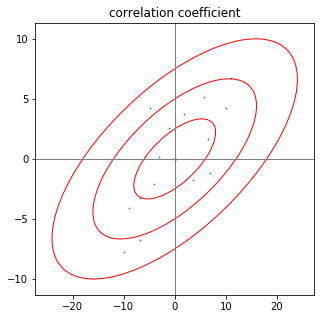

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x, y, s=0.5)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

confidence_ellipse(x, y, ax, n_std=1, edgecolor='red')
confidence_ellipse(x, y, ax, n_std=2, edgecolor='red')
confidence_ellipse(x, y, ax, n_std=3, edgecolor='red')
ax.scatter(0, 0, c='red', s=3)
ax.set_title('correlation coefficient')

plt.show()